In [1]:
# Import libraries and dependencies
from copy import deepcopy
from typing import Tuple, List, Dict

from cluster.cluster import CustomCluster
from configurations.default_values import (
    DefaultQueries,
    DefaultShodanValues,
    DefaultValues,
)
from handlers.files_handler import FilesHandler
from handlers.shodan_handler import ShodanHandler
from helpers.tools import Tools
from parsers.http_parser import HttpParser

In [2]:
# Create cluster
raw_results = FilesHandler().open_results(filename=DefaultValues.DATA_FILE)
http_parser = HttpParser(
    process_cookie=True,
    process_trash_headers=True,
    remove_digits=True,
    remove_special=True,
)
prepared_results = Tools.process_data(deepcopy(raw_results), http_parser)

cluster = CustomCluster(prepared_results)
cluster.prepare_matrix()

Calculate results for 1 clusters
Calculate results for 2 clusters
Calculate results for 3 clusters
Calculate results for 4 clusters
Calculate results for 5 clusters
Calculate results for 6 clusters
Calculate results for 7 clusters
Calculate results for 8 clusters
Calculate results for 9 clusters


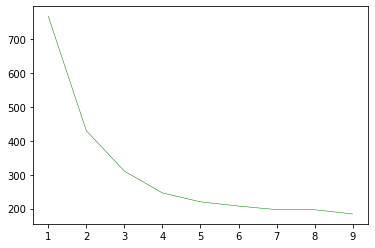

In [3]:
# Determine quantity of cluster with the Elbow method
cluster.determine_k(k_range=(1, 10))

In [4]:
# Use also the Silhouette score method
_clusters_q = cluster.calculate_silhouette_score(k_range=(2, 10))
cluster.make_cluster(clusters_q=_clusters_q)

Current cluster: 2, silhouette score: 0.7153906264306064
Current cluster: 3, silhouette score: 0.805620829044585
Current cluster: 4, silhouette score: 0.838432280136193
Current cluster: 5, silhouette score: 0.8232291292207216
Current cluster: 6, silhouette score: 0.8265139534312941
Current cluster: 7, silhouette score: 0.8365498874288534
Current cluster: 8, silhouette score: 0.8323306727283303
Current cluster: 9, silhouette score: 0.8344621273559327
The best K number is: 4
Current cluster: 0
['envoy', 'upstream', 'service', 'time', 'express', 'powered', 'istio', 'randomvaluelastmodified', 'etag', 'public', 'modified', 'randomvalueetag', 'age', 'max', 'content', 'server', 'utf', 'charset', 'accept', 'bytes']
Current cluster: 1
['kbn', 'cache', 'content', 'accept', 'version', 'kibana', 'vary', 'encoding', 'alive', 'ranges', 'bytes', 'randomvaluecontentlength', 'control', 'ok', 'type', 'date', 'text', 'randomvaluedate', 'charset', 'utf']
Current cluster: 2
['kbn', 'xpack', 'sig', 'cache',

In [5]:
# Print example samples from clusters
print(" ---\nExamples from clusters directly\n --- ")
direct_examples = {}
for class_name, class_hosts in raw_results.items():
    for host_data in class_hosts:
        processed_host = http_parser.process_headers(host_data)
        cluster_index = cluster.predict(processed_host)[0]
        if cluster_index not in direct_examples.keys():
            direct_examples[cluster_index] = []
        else:
            direct_examples[cluster_index].append(
                {"class_name": class_name, "data": host_data}
            )
direct_examples = {
    key: direct_examples[key] for key in sorted(direct_examples.keys())
}
for index, hosts in direct_examples.items():
    print(f"Cluster [{index}]:")
    for host in hosts[:5]:
        print(
            host.get("class_name"), f"[{index}]", "\t - \t", repr(host.get("data"))
        )

 ---
Examples from clusters directly
 --- 
Cluster [0]:
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Thu, 19 Mar 2020 15:56:42 GMT\r\nContent-Type: text/html; charset=UTF-8\r\nContent-Length: 1433\r\nConnection: keep-alive\r\nx-powered-by: Express\r\naccept-ranges: bytes\r\ncache-control: public, max-age=0\r\nlast-modified: Wed, 30 Oct 2019 11:53:57 GMT\r\netag: W/"599-16e1c83e808"\r\nx-envoy-upstream-service-time: 0\r\nserver: istio-envoy\r\n\r\n'
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Wed, 18 Mar 2020 10:11:05 GMT\r\nContent-Type: text/html; charset=UTF-8\r\nContent-Length: 1433\r\nConnection: keep-alive\r\nx-powered-by: Express\r\naccept-ranges: bytes\r\ncache-control: public, max-age=0\r\nlast-modified: Wed, 30 Oct 2019 11:53:57 GMT\r\netag: W/"599-16e1c83e808"\r\nx-envoy-upstream-service-time: 0\r\nserver: istio-envoy\r\n\r\n'
http.title:"Kubeflow Central Dashboard" [0] 	 - 	 'HTTP/1.1 200 OK\r\nDate: Thu, 19 Mar 